# Deep Learning Project

## Aim of this project

## The Dataset Features

## First steps - importing libraries and reading the file

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load the data
df = pd.read_csv('/content/drive/My Drive/Multivariate_pollution.csv')

# Data Preparation and brief Exploration

##Get to know the dataset

In [ ]:
# First look at the head
display(df.head())

# Check info
print(df.info())

,date,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
0,2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0
1,2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2,2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0
3,2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0
4,2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43800 entries, 0 to 43799
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       43800 non-null  object 
 1   pollution  43800 non-null  float64
 2   dew        43800 non-null  int64  
 3   temp       43800 non-null  float64
 4   press      43800 non-null  float64
 5   wnd_dir    43800 non-null  object 
 6   wnd_spd    43800 non-null  float64
 7   snow       43800 non-null  int64  
 8   rain       43800 non-null  int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 3.0+ MB
None


In [ ]:
# Check desriptive statistics
print(df.describe())

# See columns
print(df.columns)

          pollution           dew          temp         press       wnd_spd  \
count  43800.000000  43800.000000  43800.000000  43800.000000  43800.000000   
mean      94.013516      1.828516     12.459041   1016.447306     23.894307   
std       92.252276     14.429326     12.193384     10.271411     50.022729   
min        0.000000    -40.000000    -19.000000    991.000000      0.450000   
25%       24.000000    -10.000000      2.000000   1008.000000      1.790000   
50%       68.000000      2.000000     14.000000   1016.000000      5.370000   
75%      132.250000     15.000000     23.000000   1025.000000     21.910000   
max      994.000000     28.000000     42.000000   1046.000000    585.600000   

               snow          rain  
count  43800.000000  43800.000000  
mean       0.052763      0.195023  
std        0.760582      1.416247  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      0.000000  


##Data cleaning

In [ ]:
# Convert datetime
df['date'] = pd.to_datetime(df['date'])

# Verify the type with info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43800 entries, 0 to 43799
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       43800 non-null  datetime64[ns]
 1   pollution  43800 non-null  float64       
 2   dew        43800 non-null  int64         
 3   temp       43800 non-null  float64       
 4   press      43800 non-null  float64       
 5   wnd_dir    43800 non-null  object        
 6   wnd_spd    43800 non-null  float64       
 7   snow       43800 non-null  int64         
 8   rain       43800 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(3), object(1)
memory usage: 3.0+ MB
None


In [ ]:
# One-hot encoding for 'wnd_dir'
df = pd.get_dummies(df, columns=['wnd_dir'], drop_first=True)

# Display the first few rows to verify the changes
print(df.head())

                 date  pollution  dew  temp   press  wnd_spd  snow  rain  \
0 2010-01-02 00:00:00      129.0  -16  -4.0  1020.0     1.79     0     0   
1 2010-01-02 01:00:00      148.0  -15  -4.0  1020.0     2.68     0     0   
2 2010-01-02 02:00:00      159.0  -11  -5.0  1021.0     3.57     0     0   
3 2010-01-02 03:00:00      181.0   -7  -5.0  1022.0     5.36     1     0   
4 2010-01-02 04:00:00      138.0   -7  -5.0  1022.0     6.25     2     0   

   wnd_dir_NW  wnd_dir_SE  wnd_dir_cv  
0       False        True       False  
1       False        True       False  
2       False        True       False  
3       False        True       False  
4       False        True       False  


In [ ]:
# Check the shape
print(df.shape)

(43800, 11)


In [ ]:
# Count the NaN values by column
print(df.isna().sum())

date          0
pollution     0
dew           0
temp          0
press         0
wnd_spd       0
snow          0
rain          0
wnd_dir_NW    0
wnd_dir_SE    0
wnd_dir_cv    0
dtype: int64


In [ ]:
# Check duplicates
print(df.duplicated().any())
print(df.duplicated().sum())

False
0


## Mini Exploratory Analysis

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for the plots
sns.set(style="whitegrid")

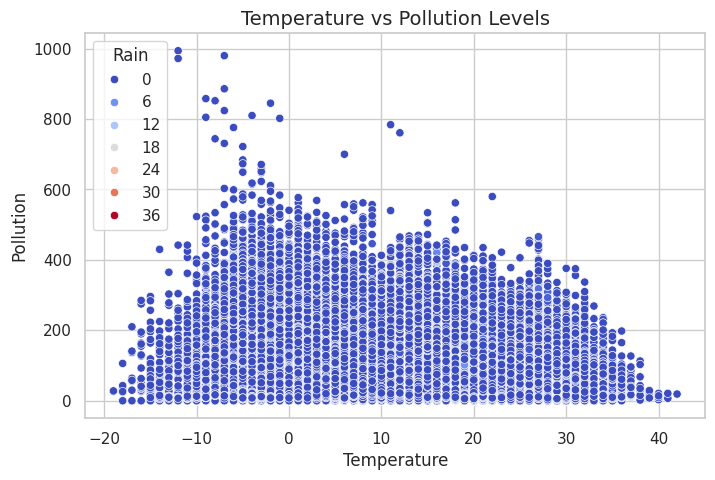

In [ ]:
# Scatterplot on Temperature vs Pollution
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['temp'], y=df['pollution'], hue=df['rain'], palette='coolwarm')
plt.title("Temperature vs Pollution Levels", fontsize=14)
plt.xlabel("Temperature")
plt.ylabel("Pollution")
plt.legend(title="Rain", loc="upper left")
plt.show()

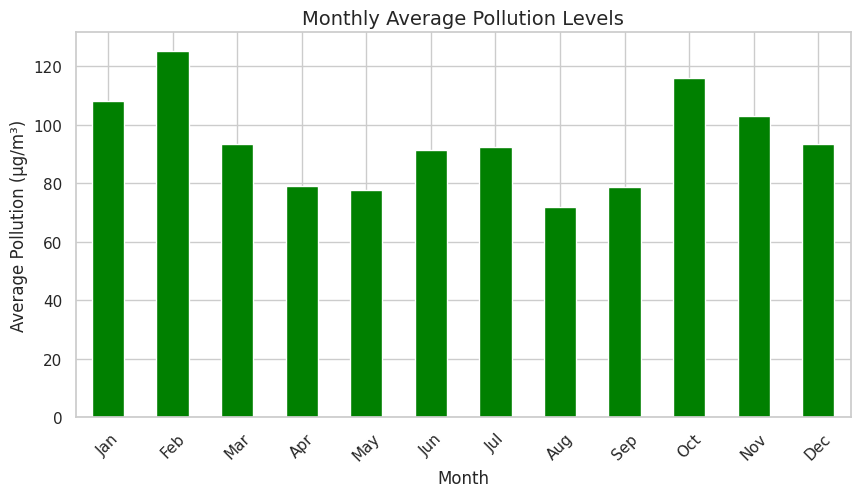

In [ ]:
# Monthly Average Pollution plot
df['month'] = df['date'].dt.month
monthly_avg_pollution = df.groupby('month')['pollution'].mean()

plt.figure(figsize=(10, 5))
monthly_avg_pollution.plot(kind='bar', color='green')
plt.title("Monthly Average Pollution Levels", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Average Pollution (µg/m³)")
plt.xticks(range(12),
           ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
           rotation=45)
plt.show()

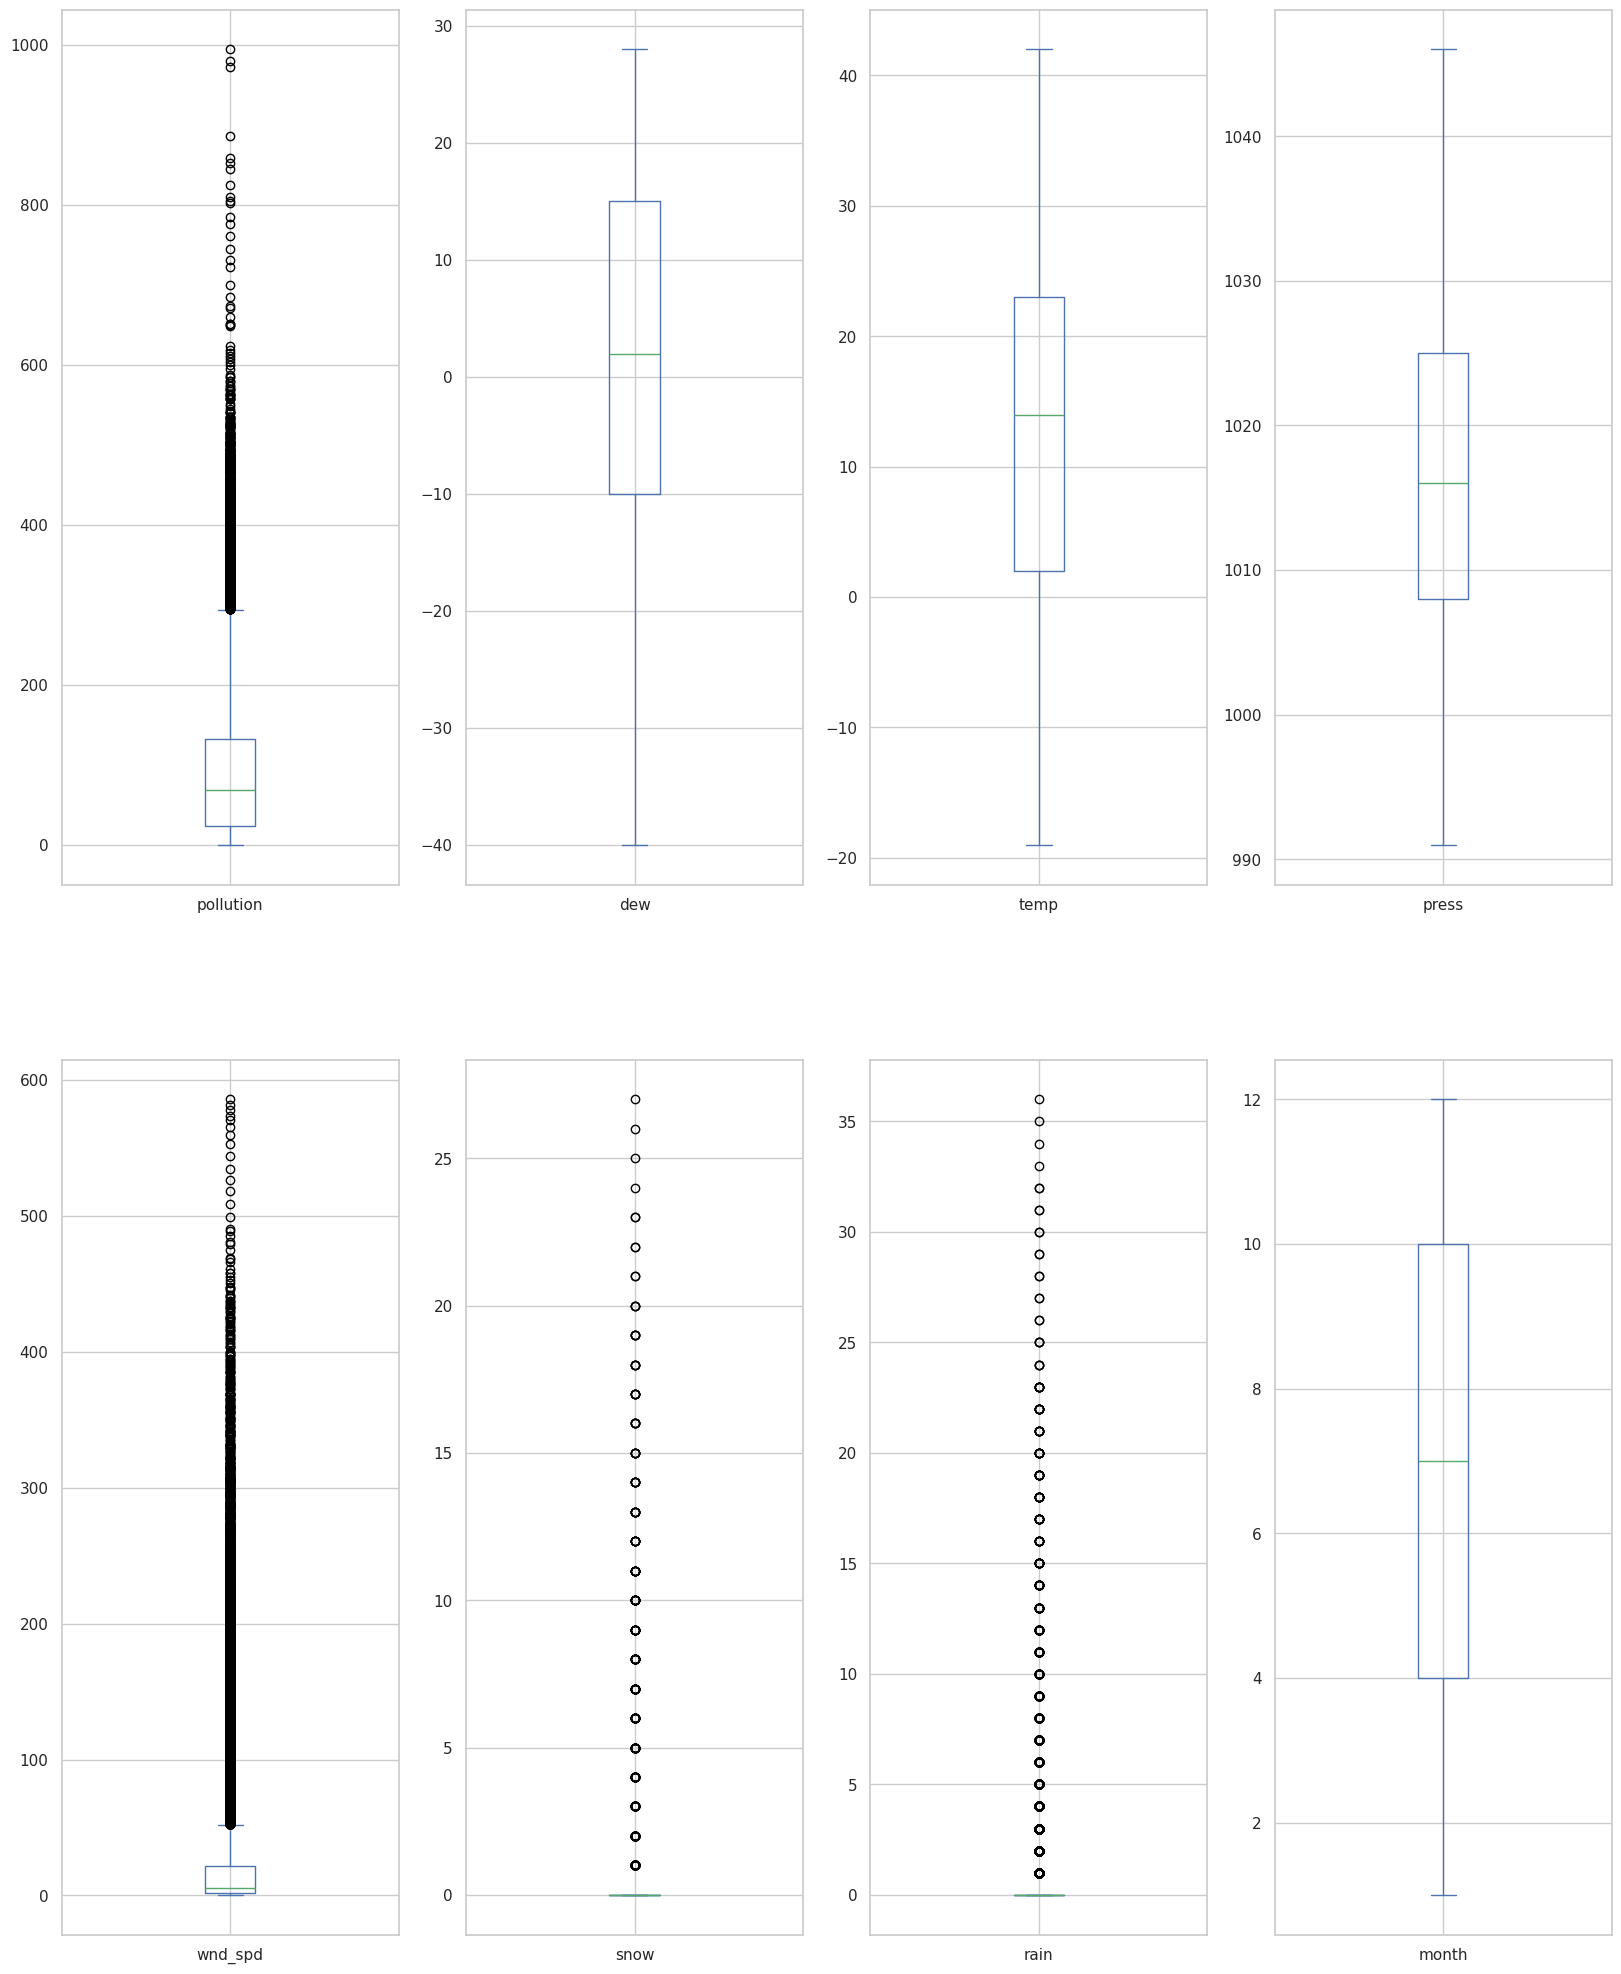

In [ ]:
## Looking for outliers
df.plot.box(subplots=True, layout=(-1,4), figsize=(20,25));

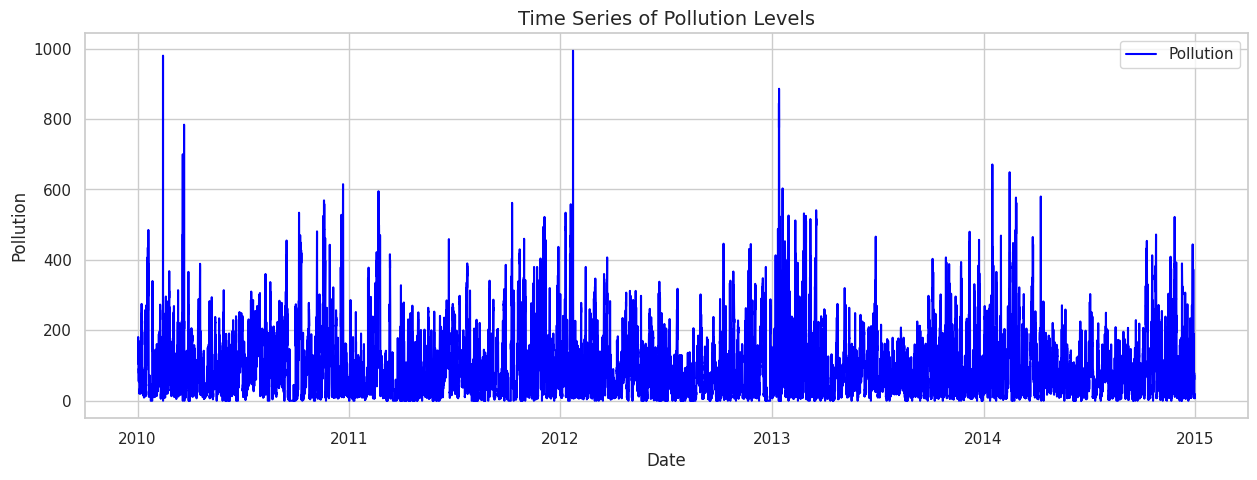

In [ ]:
# Time-series of Pollution plot
plt.figure(figsize=(15, 5))
plt.plot(df['date'], df['pollution'], color='blue', label='Pollution')
plt.title("Time Series of Pollution Levels", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Pollution")
plt.legend()
plt.show()

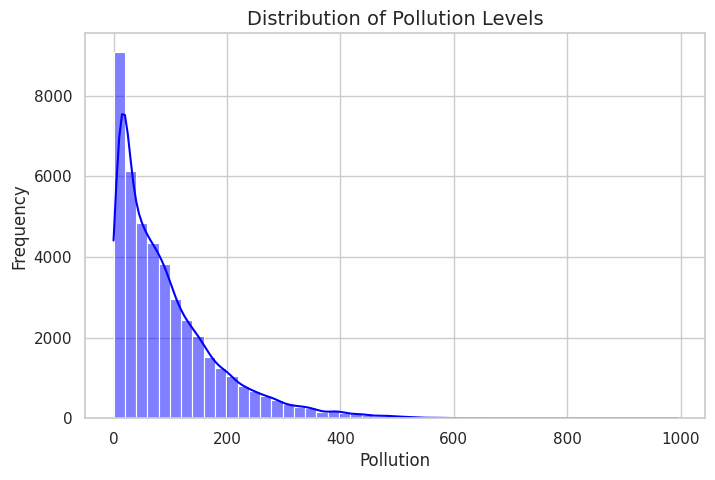

In [ ]:
# Distribution of Pollution Levels plot
plt.figure(figsize=(8, 5))
sns.histplot(df['pollution'], kde=True, bins=50, color='blue')
plt.title("Distribution of Pollution Levels", fontsize=14)
plt.xlabel("Pollution")
plt.ylabel("Frequency")
plt.show()

In [ ]:
#Handling pollution and wnd_spd outliers
pollution_cap = df['pollution'].quantile(0.99)
wind_speed_cap = df['wnd_spd'].quantile(0.99)
df['pollution'] = df['pollution'].apply(lambda x: min(x, pollution_cap))
df['wnd_spd'] = df['wnd_spd'].apply(lambda x: min(x, wind_speed_cap))

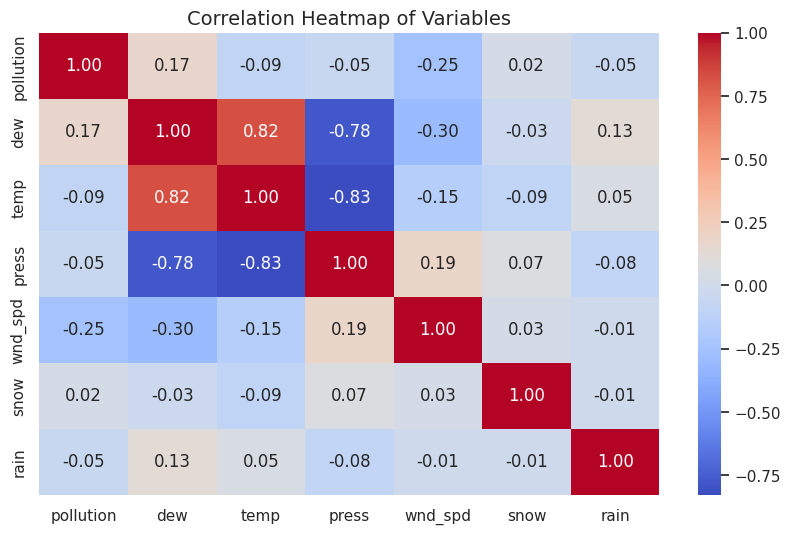

In [ ]:
# Filter the dataframe to include only numerical columns
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Correlation matrix and heatmap
plt.figure(figsize=(10, 6))

# Calculate correlation
correlation_matrix = numerical_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Variables", fontsize=14)
plt.show()

# Creating train-test split

In [ ]:
# Define the cutoff date for splitting the data
cutoff_date = '2014-01-01'

# Split the data into training and testing sets based on the date
train_data = df[df['date'] < cutoff_date]
test_data = df[df['date'] >= cutoff_date]

# Separate features and target variable
X_train = train_data.drop(columns=['pollution', 'date'])
y_train = train_data['pollution']

X_test = test_data.drop(columns=['pollution', 'date'])
y_test = test_data['pollution']

# Check the shapes of the resulting datasets
print(f"Training features shape: {X_train.shape}")
print(f"Test features shape: {X_test.shape}")
print(f"Training target shape: {y_train.shape}")
print(f"Test target shape: {y_test.shape}")

Training features shape: (35040, 10)
Test features shape: (8760, 10)
Training target shape: (35040,)
Test target shape: (8760,)


In [ ]:
from sklearn.model_selection import train_test_split

# Use 20% of the training data for validation
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

## Normalizing with MinMaxScaler

In [ ]:
# Normalize with MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Display
print("X_train_scaled range:", X_train_scaled.min(), "to", X_train_scaled.max())
print("X_val_scaled range:", X_val_scaled.min(), "to", X_val_scaled.max())
print("X_test_scaled range:", X_test_scaled.min(), "to", X_test_scaled.max())

X_train_scaled range: 0.0 to 1.0
X_val_scaled range: 0.0 to 1.0588235294117647
X_test_scaled range: -0.11475409836065575 to 1.0166666666666666


#Deep Learning Model

In [ ]:
# Create lagged features for 24-hour forecasting
lag_hours = 24
for lag in range(1, lag_hours + 1):
    df[f'pollution_lag_{lag}'] = df['pollution'].shift(lag)

# Drop rows with NaN values due to shifting
df_lagged = df.dropna()

# Define features and target variable
X = df_lagged.drop(columns=['pollution', 'date'])
y = df_lagged['pollution']

# Use the revised train-test split
train_data = df_lagged[df_lagged['date'] < '2014-01-01']
test_data = df_lagged[df_lagged['date'] >= '2014-01-01']

# Train-test split based on time (already described)
cutoff_date = '2014-01-01'
train_data = df[df['date'] < cutoff_date]
test_data = df[df['date'] >= cutoff_date]

X_train = train_data.drop(columns=['pollution', 'date'])
y_train = train_data['pollution']
X_test = test_data.drop(columns=['pollution', 'date'])
y_test = test_data['pollution']

In [ ]:
# Check for NaN or infinite values
if X_train.isna().sum().sum() > 0 or np.isinf(X_train).sum().sum() > 0:
    print("NaN or infinite values exist in X_train. Please clean the data.")

NaN or infinite values exist in X_train. Please clean the data.


In [ ]:
import numpy as np

# Drop rows with NaN or infinite values
X_train = X_train.dropna()
y_train = y_train[X_train.index]
X_train = X_train[np.isfinite(X_train).all(axis=1)]
y_train = y_train[np.isfinite(X_train).all(axis=1)]

## Implement the Model

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

# Build the Neural Network model
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
model.add(BatchNormalization())  # Added Batch Normalization to stabilize training
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.2))  # Dropout to prevent overfitting
model.add(Dense(units=1))  # Output layer for regression

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), loss='mean_squared_error')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

# Drop 'date' and keep lagged features only
X = df.drop(columns=['pollution', 'date'])
y = df['pollution']

# Normalize the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the Neural Network model
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1))  # Output layer for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
loss = model.evaluate(X_test_scaled, y_test)
print(f"Test Loss (MSE): {loss}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
876/876 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 7818.8828 - val_loss: 926.1801
Epoch 2/5
876/876 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1373.8918 - val_loss: 663.9482
Epoch 3/5
876/876 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1129.0048 - val_loss: 579.1665
Epoch 4/5
876/876 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1054.1315 - val_loss: 543.9238
Epoch 5/5
876/876 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1047.7563 - val_loss: 516.4218
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 663.9726
Test Loss (MSE): 558.9884643554688


## Hyperparameter tuning

In [ ]:
# Installing keras_tuner
!pip install keras-tuner --upgrade

In [ ]:
from keras_tuner.tuners import RandomSearch

# Prepare data as before (using lagged features and scaled)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define a function to build the model
def build_model(hp):
    model = Sequential()
    # Tune the number of units in the first Dense layer
    hp_units = hp.Int('units', min_value=32, max_value=256, step=32)
    model.add(Dense(units=hp_units, activation='relu', input_dim=X_train.shape[1]))

    # Add another hidden layer with a tunable number of units
    hp_units_2 = hp.Int('units_2', min_value=32, max_value=128, step=32)
    model.add(Dense(units=hp_units_2, activation='relu'))

    # Tune dropout rate
    hp_dropout = hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1)
    model.add(Dropout(hp_dropout))

    # Output layer
    model.add(Dense(units=1))

    # Tune learning rate for the optimizer
    hp_learning_rate = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate),
                  loss='mean_squared_error')
    return model

# Use RandomSearch for hyperparameter tuning
tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=5,
    executions_per_trial=1,
    directory='tuning_results',
    project_name='pollution_forecasting'
)

# Run the hyperparameter search
tuner.search(X_train_scaled, y_train, epochs=5, validation_split=0.2, batch_size=32)

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"""
The optimal number of units in the first layer is {best_hps.get('units')}.
The optimal number of units in the second layer is {best_hps.get('units_2')}.
The optimal dropout rate is {best_hps.get('dropout')}.
The optimal learning rate is {best_hps.get('learning_rate')}.
""")

# Build and train the model with the best hyperparameters
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train_scaled, y_train, epochs=5, validation_split=0.2, batch_size=32)

# Evaluate the model on the test set
loss = model.evaluate(X_test_scaled, y_test)
print(f"Test Loss (MSE): {loss}")

Reloading Tuner from tuning_results/pollution_forecasting/tuner0.json

The optimal number of units in the first layer is 96.
The optimal number of units in the second layer is 96.
The optimal dropout rate is 0.30000000000000004.
The optimal learning rate is 0.0038692738940754694.

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


876/876 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 3932.0454 - val_loss: 532.9005
Epoch 2/5
876/876 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 878.0684 - val_loss: 501.3105
Epoch 3/5
876/876 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 858.3409 - val_loss: 473.7494
Epoch 4/5
876/876 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 876.6967 - val_loss: 463.6647
Epoch 5/5
876/876 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - loss: 855.7695 - val_loss: 494.4394
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 599.9704
Test Loss (MSE): 534.1055908203125


## Evaulation of my model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.impute import SimpleImputer

# Define features and target variable using the same split as the deep learning model
X_train = train_data.drop(columns=['pollution', 'date'])
y_train = train_data['pollution']
X_test = test_data.drop(columns=['pollution', 'date'])
y_test = test_data['pollution']

# Impute NaN values using SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns, index=X_test.index)

# Train a simple linear regression model as a baseline
baseline_model = LinearRegression()
baseline_model.fit(X_train, y_train)

# Predict on the test set
y_pred_baseline = baseline_model.predict(X_test)

# Calculate evaluation metrics for the baseline model
mse_baseline = mean_squared_error(y_test, y_pred_baseline)
mae_baseline = mean_absolute_error(y_test, y_pred_baseline)
r2_baseline = r2_score(y_test, y_pred_baseline)

# Print evaluation results
print(f"Baseline Model Test Loss (MSE): {mse_baseline}")
print(f"Baseline Model Test Loss (MAE): {mae_baseline}")
print(f"Baseline Model R² Score: {r2_baseline}")

Baseline Model Test Loss (MSE): 513.5976457130839
Baseline Model Test Loss (MAE): 12.2768861330952
Baseline Model R² Score: 0.9370979341442179


### Evaluation metrics

In [ ]:
# Deep Learning Model Evaluation Metrics

# Predict on the test set using the deep learning model
y_pred_dl = model.predict(X_test_scaled)

# Calculate evaluation metrics for the deep learning model
mse_dl = mean_squared_error(y_test, y_pred_dl)
mae_dl = mean_absolute_error(y_test, y_pred_dl)
r2_dl = r2_score(y_test, y_pred_dl)

# Print evaluation results for the deep learning model
print(f"Deep Learning Model Test Loss (MSE): {mse_dl}")
print(f"Deep Learning Model Test Loss (MAE): {mae_dl}")
print(f"Deep Learning Model R² Score: {r2_dl}")


274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Deep Learning Model Test Loss (MSE): 534.105751033132
Deep Learning Model Test Loss (MAE): 13.288596513663252
Deep Learning Model R² Score: 0.9345862361210934


#### Training and Validation Loss

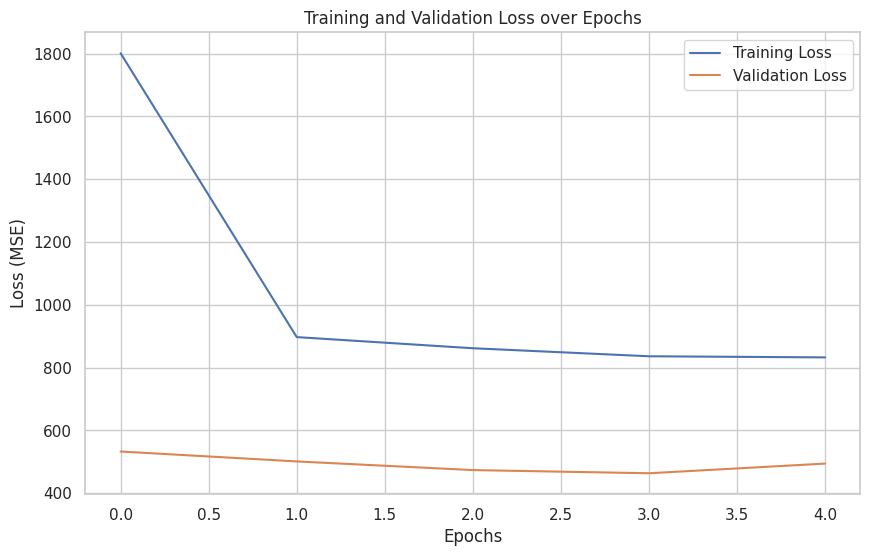

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'history' is the history object returned by model.fit()
# Plot the training and validation loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()

##Saving the best model

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Define a checkpoint callback to save the best performing model
checkpoint = ModelCheckpoint(
    filepath='best_performance_model.keras',  # Save the model in .keras format
    monitor='val_loss',  # Metric to monitor for improvements
    save_best_only=True,  # Save only the best model
    mode='min',
    verbose=1
)

# Train the model with the checkpoint callback
history = model.fit(
    X_train_scaled,
    y_train,
    epochs=5,
    batch_size=32,
    validation_split=0.2,
    callbacks=[checkpoint]
)

Epoch 1/5
876/876 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1607.0016
Epoch 1: val_loss improved from inf to 23.59591, saving model to best_performance_model.keras
876/876 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 1605.8890 - val_loss: 23.5959
Epoch 2/5
874/876 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 193.8793
Epoch 2: val_loss improved from 23.59591 to 21.15104, saving model to best_performance_model.keras
876/876 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 193.8558 - val_loss: 21.1510
Epoch 3/5
874/876 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 182.8922
Epoch 3: val_loss improved from 21.15104 to 7.25151, saving model to best_performance_model.keras
876/876 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 182.8916 - val_loss: 7.2515
Epoch 4/5
876/876 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 168.9109
Epoch 4: val_loss did not improve from 7.25151
876/876 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 168.9144 - val_loss: 12.3641
Epoch 5/5
872/876 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 177.2138
Epoch 5: 